## Trained and Tested on FairSIM Dataset

Written by: Bereket Kebede <br>
Last Updated on: June 27, 2023 <br>
Written as part of MS Thesis <br>


In [2]:
###############################################################
# import libraries

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage.io
import skimage.util
from tifffile import imsave
import scipy.ndimage
from skimage.measure import profile_line

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nrmse

In [3]:
my_list = UNET_3D, UNET_2D, Ground_Truth, Wide_Field = [r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\3D.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\2D.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\ground_truth.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\wide_field.tif"]

In [4]:
second_list = []
for i in my_list:
    second_list.append(io.imread(i))

In [5]:
def normalize_volume(GT_image):
    clipped_data = GT_image.copy() # at channel 0
    clipped_data[clipped_data<0] = 0    #thresholding
    apodized_data = clipped_data - np.min(clipped_data)
    norm_3D_data = apodized_data/np.max(apodized_data)
    return norm_3D_data

In [6]:
print(second_list[0].shape)
print(second_list[1].shape)
print(second_list[2].shape)
print(second_list[3].shape)

(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)
(53, 512, 512)


In [7]:
second_list[3] = scipy.ndimage.zoom(second_list[3][0:32], zoom = (2,2,2), order = 1)

In [8]:
print(second_list[0].shape)
print(second_list[1].shape)
print(second_list[2].shape)
print(second_list[3].shape)

(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)


In [9]:
seconddd_list = []
for i in range(4):
    seconddd_list.append(normalize_volume(second_list[i]))

In [10]:
UNET_3D, UNET_2D, Ground_Truth, Wide_Field = [second_list[0],second_list[1],second_list[2], second_list[3]]

## Axis Steup

In [11]:
my_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Trained and Tested on FairSIM Dataset\new_axis_fairsim_lateral.png")
my_zoomed_lateral_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Trained and Tested on FairSIM Dataset\new_lateral_axis_y_100_x_100.png")
my_z_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Trained and Tested on FairSIM Dataset\new_axis_fairsim_axial.png")
my_y_axis_zoom = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\utilities\150_Z_150_X_axis.png")


In [12]:
my_axis[:,:,0].shape

(256, 1024)

In [13]:
# Create a Rectangle patch
import matplotlib.patches as patches
rect = patches.Rectangle((10, 10), 40, 30, linewidth=1, edgecolor='y', facecolor='none')

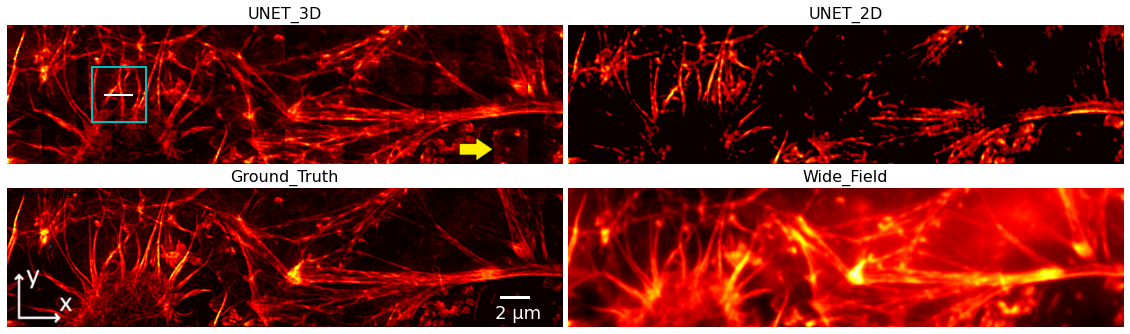

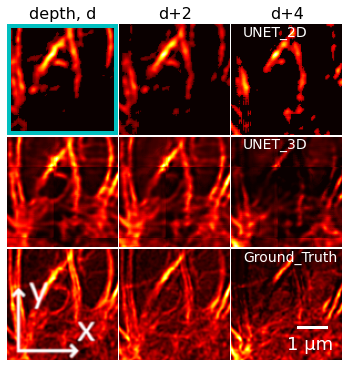

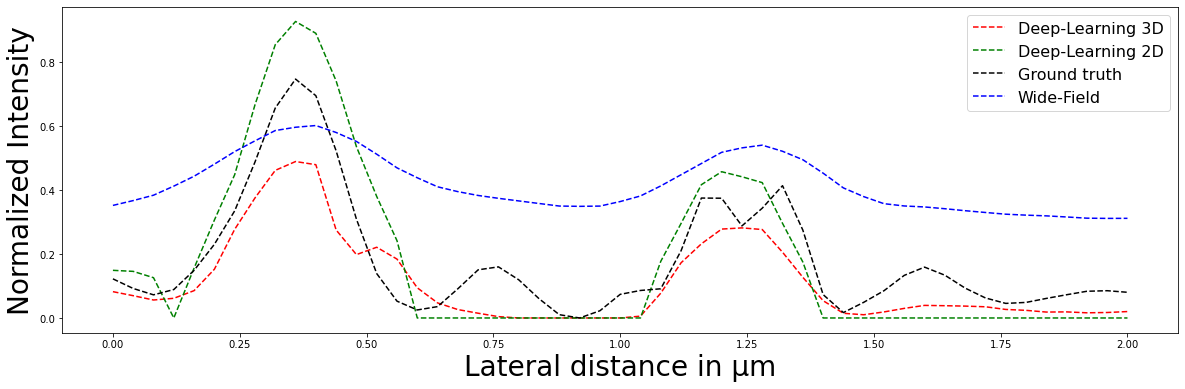

In [39]:
length = 50
move_x = 180

# profile line
start_2 = (second_list[0][11,768:1024,:].shape[0]//2,move_x)
end_2 = (second_list[0][11,768:1024,:].shape[0]//2, move_x+length)

########################################################################
############################################## Normal Figures
columns = 2
rows = 2

fig, ax = plt.subplots(rows, columns, figsize=(20, 6)) # setup the figures
plt.axis('off')
spoon = slice(768,1024)
depth = 10

count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].imshow(normalize_volume(seconddd_list[count][depth,spoon,:]), cmap = 'hot') #testing
        ax[0,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
        count+=1

for i in range(columns):
    for j in range(rows):
        ax[i,j].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["UNET_3D", "UNET_2D", "Ground_Truth", "Wide_Field"]

count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].set_title(title_list[count], fontsize =16)
        count+=1

rect = patches.Rectangle((180-25, 128-50), 100, 100, linewidth=2, edgecolor='c', facecolor='none')
ax[0,0].add_patch(rect)
ax[1,0].imshow(my_axis)

ax[1,0].plot([910,960],[200,200], 'w-', lw=3) #Plot a red line across the film
ax[1,0].text(900,240,"2 μm", fontsize =18, color ='white')

ax[1,0].arrow(x=80, y=100, dx=0, dy=5, width=2) 
ax[1,0].annotate('General direction', xy = (3.4, 17))


arrow_link = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Trained and Tested on FairSIM Dataset\arrow.png")

arrow = fig.add_axes([0.34,0.5,0.13,0.13], anchor='SE', zorder=1)
arrow.axis('off')
arrow.imshow(arrow_link)
arrow.patch.set_alpha(0)

############################################################
########################### Zoomed in picture
columns = 3
rows = 3

fig_3, ax_3 = plt.subplots(rows, columns, figsize=(6, 6.2)) # setup the figures

plt.axis('off')
spoon = slice(768,1024)
depth = 10

zoom_spoon_x = slice(150,250)
zoom_spoon_y = slice(100,200)

for i in range(columns):
    ax_3[0,i].imshow(normalize_volume(seconddd_list[1][depth+2*i,spoon,:])[zoom_spoon_y, zoom_spoon_x], cmap = 'hot')
for i in range(columns):
    ax_3[1,i].imshow(normalize_volume(seconddd_list[0][depth+2*i,spoon,:])[zoom_spoon_y, zoom_spoon_x], cmap = 'hot')
for i in range(columns):
    ax_3[2,i].imshow(normalize_volume(seconddd_list[2][depth+2*i,spoon,:])[zoom_spoon_y, zoom_spoon_x], cmap = 'hot')
for i in range(columns):
    for j in range(rows):
        ax_3[i,j].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

ax_3[0,0].set_title('depth, d', fontsize =16)
ax_3[0,1].set_title('d+2', fontsize =16)
ax_3[0,2].set_title('d+4', fontsize =16)
ax_3[0,2].text(10,10,"UNET_2D", fontsize =14, color ='white')
ax_3[1,2].text(10,10,"UNET_3D", fontsize =14, color ='white')
ax_3[2,2].text(10,10,"Ground_Truth", fontsize =14, color='white')

rect = patches.Rectangle((0, 0), 98, 98, linewidth=5, edgecolor='c', facecolor='none')
ax_3[0,0].add_patch(rect)
ax_3[2,0].imshow(my_zoomed_lateral_axis)

ax_3[2,2].plot([60,85],[70,70], 'w-', lw=3) 
ax_3[2,2].text(50,90,"1 μm", fontsize =18, color ='white')

####################################################################
fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #Plot profiles
    
profile = profile_line(second_list[0][11,spoon,:]/np.max(second_list[0][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(second_list[1][11,spoon,:]/np.max(second_list[1][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(second_list[2][11,spoon,:]/np.max(second_list[2][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(second_list[3][11,spoon,:]/np.max(second_list[3][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 

#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile, 'r--')
ax_2.plot(x1,profile_2, 'g--')
ax_2.plot(x1,profile_3, 'k--')
ax_2.plot(x1,profile_4, 'b--')

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

In [14]:
# check the types of array before comparison

print(seconddd_list[0].dtype)
print(seconddd_list[1].dtype)
print(seconddd_list[2].dtype)
print('------------------')
print(np.min(seconddd_list[0]))
print(np.min(seconddd_list[1]))
print(np.min(seconddd_list[2]))
print('------------------')
print(np.max(seconddd_list[0]))
print(np.max(seconddd_list[1]))
print(np.max(seconddd_list[2]))

float32
float32
float32
------------------
0.0
0.0
0.0
------------------
1.0
1.0
1.0


In [15]:
# FOR 2D

print('psnr: ',psnr(seconddd_list[0],seconddd_list[2]))
print('nrmse: ',nrmse(seconddd_list[0],seconddd_list[2]))
print('ssim: ',ssim(seconddd_list[0],seconddd_list[2]))
print('------------------')

# For 3D
print('psnr: ',psnr(seconddd_list[1],seconddd_list[2]))
print('nrmse: ',nrmse(seconddd_list[1],seconddd_list[2]))
print('ssim: ',ssim(seconddd_list[1],seconddd_list[2]))

psnr:  31.566961589032804
nrmse:  0.5500308773805822
ssim:  0.8333209741972699
------------------
psnr:  23.283591350421506
nrmse:  0.8386824197067938
ssim:  0.635285137015793


## 2D VS 3D - Global

### Train

In [28]:
spoon = slice(0,512)

# 3D

print('3D')
print('psnr: ',psnr(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(normalize_volume(second_list[0][:,spoon,:]),normalize_volume(second_list[2][:,spoon,:])))

# 2D
print('------------------')

print('2D')
print('psnr: ',psnr(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))

3D
psnr:  32.566029403072015
nrmse:  0.49305118375847456
ssim:  0.8641670760521203
------------------
2D
psnr:  23.424746130216217
nrmse:  0.8621189441526123
ssim:  0.6518221739523543


## 2D VS 3D - Global

### Valid

In [29]:
spoon = slice(512,768)

# 3D

print('3D')
print('psnr: ',psnr(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))

# 2D

print('2D')
print('psnr: ',psnr(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(normalize_volume(second_list[1][:,spoon,:]),normalize_volume(second_list[2][:,spoon,:])))

3D
psnr:  31.22560699079793
nrmse:  0.5369937146595742
ssim:  0.8384670459969095
2D
psnr:  23.082517627172443
nrmse:  0.8476049426907193
ssim:  0.6217266816448087


## 2D VS 3D - Global

### Test

In [17]:
spoon = slice(768,1024)

# 3D

print('3D')
print('psnr: ',psnr(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(second_list[0][:,spoon,:],second_list[2][:,spoon,:]))

# 2D

print('2D')
print('psnr: ',psnr(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('nrmse: ',nrmse(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))
print('ssim: ',ssim(second_list[1][:,spoon,:],second_list[2][:,spoon,:]))


3D
psnr:  30.356150623337207
nrmse:  0.671157053788204
ssim:  0.7632490954567481
2D
psnr:  23.21360331310909
nrmse:  0.7910422410039128
ssim:  0.6194182947865393


## Axial Super-Reolsution

In [27]:
import matplotlib.patches as patches

In [28]:
# Create a Rectangle patch
rect = patches.Rectangle((10, 10), 40, 30, linewidth=1, edgecolor='y', facecolor='none')

(64, 250)
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
 2.5    2.5625 2.625  2.6875 2.75   2.8125 2.875  2.9375 3.     3.0625
 3.125 ]


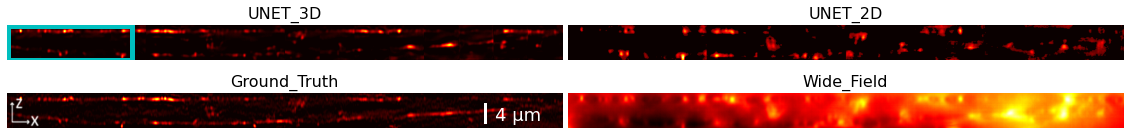

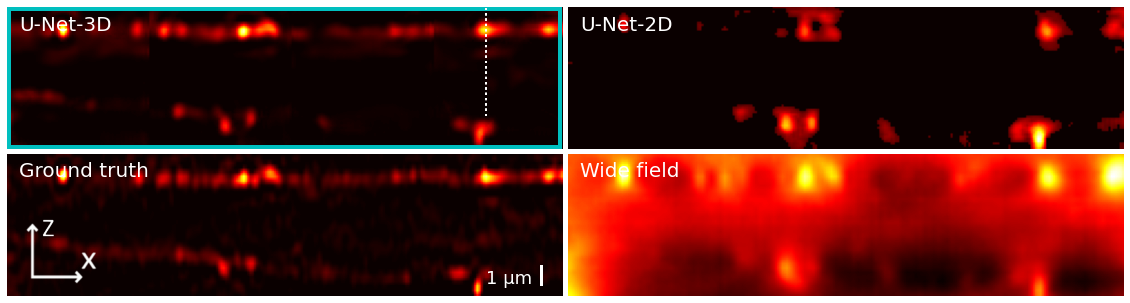

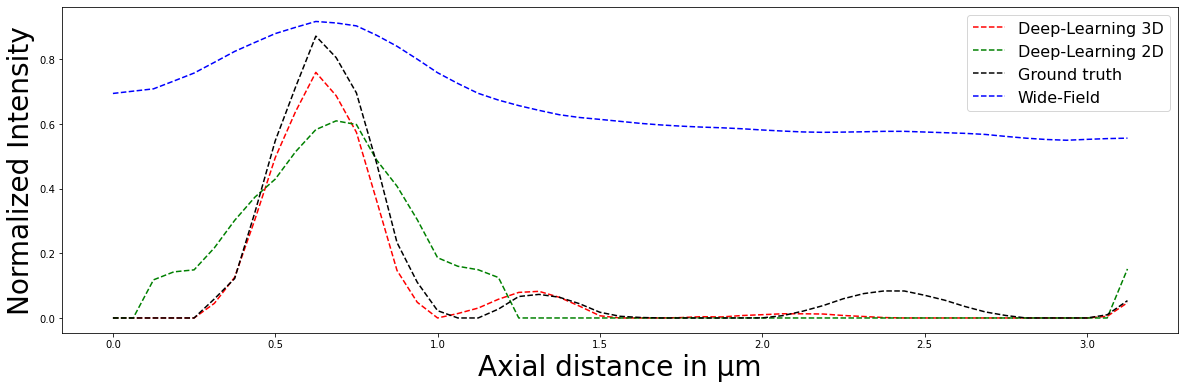

In [30]:
length = 50
x_movt = 215
y_start = 0

start_2 = (y_start,x_movt)
end_2 = (y_start+length, x_movt)
columns = 2
rows = 2

########################################################################
############################################## Normal Figures

fig_3, ax_3 = plt.subplots(rows, columns, figsize=(20, 2.5)) # setup the figures
plt.axis('off')
count = 0
for i in range(columns):
    for j in range(rows):
        ax_3[i,j].imshow(normalize_volume(seconddd_list[count][:,800,:]), cmap = 'hot')
        count+=1
for i in range(columns):
    for j in range(rows):
        ax_3[i,j].axis('off')
        
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["UNET_3D", "UNET_2D", "Ground_Truth", "Wide_Field"]

count = 0
for i in range(columns):
    for j in range(rows):
        ax_3[i,j].set_title(title_list[count], fontsize =16)
        count+=1

ax_3[1,0].imshow(my_z_axis)

ax_3[1,0].plot([880,880],[20,52], 'w', lw=3) #Plot a red line across the film
ax_3[1,0].text(900,50,"4 μm", fontsize =18, color ='white')

rect = patches.Rectangle((1, 1), 229, 63, linewidth=5, edgecolor='c', facecolor='none')
ax_3[0,0].add_patch(rect)

################################################################################
fig, ax = plt.subplots(rows, columns, figsize=(20, 5.4)) #zoomed

plt.axis('off')
count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].imshow(seconddd_list[count][:,800,0:250], cmap = 'hot')
        ax[0,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w:', lw=2) #Plot a white line across the film
        count+=1

print(second_list[0][:,800,0:250].shape)
        
for i in range(columns):
    for j in range(rows):
        ax[i,j].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)
count = 0
        
profile_axial_list = []

for i in range(4):
    profile_axial_list.append(profile_line(second_list[i][:,800,0:250]/np.max(second_list[i][:,800,0:250]), start_2, end_2, linewidth=1, mode='constant')) #Take the profile line

rect = patches.Rectangle((0, 0), 249, 63, linewidth=6, edgecolor='c', facecolor='none')
ax[0,0].add_patch(rect)

ax[1,0].plot([240,240],[50,58], 'w-', lw=3) #Plot a red line across the film
ax[1,0].text(215,58,"1 μm", fontsize =18, color ='white')


newax = fig.add_axes([0,0.15,0.2,0.25], anchor='SE', zorder=1)
newax.axis('off')
newax.imshow(my_y_axis_zoom)
newax.patch.set_alpha(0)


ax[0,0].text(5,10,"U-Net-3D", fontsize =20, color ='white')
ax[0,1].text(5,10,"U-Net-2D", fontsize =20, color ='white')
ax[1,0].text(5,10,"Ground truth", fontsize =20, color='white')
ax[1,1].text(5,10,"Wide field", fontsize =20, color ='white')

##################################################################################
fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #profile plots

#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info

#divide by two because the RawSIM is upscaled 2x
# (125nm/2) calibration to um using info from MBPC paper, Table 4 
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.125/2) 

#3.125 um

print(x1)

ax_2.plot(x1,profile_axial_list[0], 'r--')
ax_2.plot(x1,profile_axial_list[1], 'g--')
ax_2.plot(x1,profile_axial_list[2], 'k--')
ax_2.plot(x1,profile_axial_list[3], 'b--')

#ax_2.grid()

plt.xlabel("Axial distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

In [19]:
# Local

print('3D')
print('psnr: ',psnr(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))
print('nrmse: ',nrmse(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))
print('ssim: ',ssim(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))

3D
psnr:  24.985496096142285
nrmse:  0.4156330773015089
ssim:  0.7594266602584467


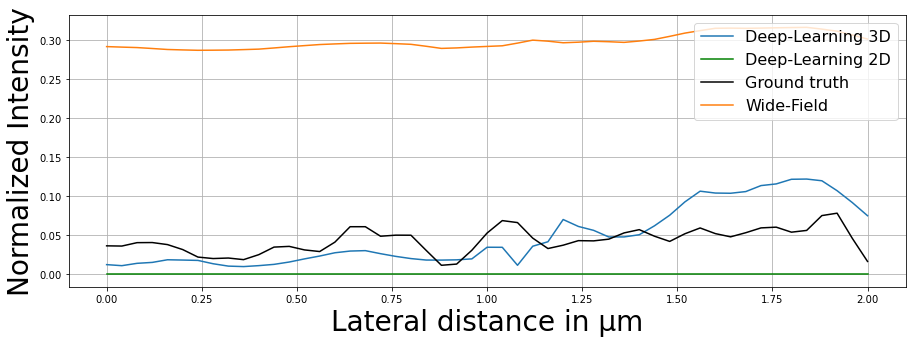

In [20]:
fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'g-')
ax_2.plot(x1,profile_3, 'k-')
ax_2.plot(x1,profile_4)

# ax_2.plot(x1,profile_dic['UNET_3D'])
# ax_2.plot(x1,profile_dic['UNET_2D'], 'g-')
# ax_2.plot(x1,profile_dic['Ground_Truth'], 'k-')
# ax_2.plot(x1,profile_dic['Wide_Field'], 'y-')


ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

In [21]:
# Local

print('3D')
print('psnr: ',psnr(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))
print('nrmse: ',nrmse(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))
print('ssim: ',ssim(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))

3D
psnr:  30.508915828286224
nrmse:  0.6068003572941554
ssim:  0.7824397113994582


In [22]:
print('2D')
print('psnr: ',psnr(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))
print('nrmse: ',nrmse(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))
print('ssim: ',ssim(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))

2D
psnr:  21.64326454309056
nrmse:  0.7756898748581759
ssim:  0.5900630703825372
